In [9]:
%cd /home/kwy00/mmdetection
%pwd

/home/kwy00/mmdetection


'/home/kwy00/mmdetection'

In [10]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
CUDA available: True
numpy_random_seed: 2147483648
GPU 0,1: NVIDIA GeForce RTX 3090
CUDA_HOME: /
NVCC: Cuda compilation tools, release 11.5, V11.5.119
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.1.0+cu121
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=

In [3]:
!ls -l

합계 168
drwxrwxr-x   2 kwy00 kwy00  4096 Nov  8 15:28 checkpoints
-rw-rw-r--   1 kwy00 kwy00   273 Nov  8 14:25 CITATION.cff
drwxrwxr-x 117 kwy00 kwy00  4096 Nov  8 14:25 configs
drwxrwxr-x   3 kwy00 kwy00  4096 Nov  8 17:11 data
-rw-rw-r--   1 kwy00 kwy00   475 Nov  8 14:25 dataset-index.yml
drwxrwxr-x   2 kwy00 kwy00  4096 Nov  8 14:25 demo
drwxrwxr-x   4 kwy00 kwy00  4096 Nov  8 14:25 docker
drwxrwxr-x   4 kwy00 kwy00  4096 Nov  8 14:25 docs
-rw-rw-r--   1 kwy00 kwy00 11398 Nov  8 14:25 LICENSE
-rw-rw-r--   1 kwy00 kwy00   242 Nov  8 14:25 MANIFEST.in
drwxrwxr-x  14 kwy00 kwy00  4096 Nov  8 15:12 mmdet
drwxrwxr-x   2 kwy00 kwy00  4096 Nov  8 14:25 mmdet.egg-info
-rw-rw-r--   1 kwy00 kwy00  3388 Nov  8 14:25 model-index.yml
drwxrwxr-x   3 kwy00 kwy00  4096 Nov  8 15:29 output
drwxrwxr-x  20 kwy00 kwy00  4096 Nov  8 14:25 projects
-rw-rw-r--   1 kwy00 kwy00   293 Nov  8 14:25 pytest.ini
-rw-rw-r--   1 kwy00 kwy00 28566 Nov  8 14:25 README.md
-rw-rw-r--   1 kwy00 kwy00 28862 Nov  8 14:2

In [7]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints # change here to download different model config file

mkdir: `./checkpoints' 디렉터리를 만들 수 없습니다: 파일이 있습니다


processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 35.5 MB/s eta 0:00:0000:0100:01
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /home/kwy00/mmdetection/checkpoints
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /home/kwy00/mmdetection/checkpoints


In [14]:
from mmdet.apis import DetInferencer

# Choose to use a config
model_name = 'rtmdet_tiny_8xb32-300e_coco'
# Setup a checkpoint file to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Loads checkpoint by local backend from path: ./checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



/home/kwy00/.local/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/kwy00/.local/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [10]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [
│   │   {
│   │   │   'labels': [13, 2, 2, 2, ... +296],
│   │   │   'scores': [0.8702132105827332, 0.7679213285446167, 0.7431573271751404, 0.6997183561325073, ... +296],
│   │   │   'bboxes': [
│   │   │   │   [221.37069702148438, 176.1219024658203, 456.2542724609375, 383.2461853027344],
│   │   │   │   [295.3443298339844, 117.18082427978516, 378.57952880859375, 150.26861572265625],
│   │   │   │   [190.56942749023438, 109.7038803100586, 299.5222473144531, 155.03558349609375],
│   │   │   │   [431.3681640625, 104.98316192626953, 484.8761291503906, 131.94161987304688],
│   │   │   │   ... +296
│   │   │   ]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[ 28,  48,  13],
│   │   [ 37,  63,  28],
│   │   [ 30,  64,  27],
│   │   ...,
│   │   [ 23,  47,  31],
│   │   [ 31,  67,  31],
│   │   [ 54,  92,  17]],
│      
│      [[ 23,  42,   0],
│   │   [ 25,  50,   8],
│   │   [ 30,  62,  21],
│   │   ...,
│   │   [ 92, 114, 102],
│   │   [ 16,  53,  12],
│   │   [ 44,  75,  16]],
│      
│      [[ 20,  50,   0],
│   │   [ 25,  59,   8],
│   │   [ 29,  66,  23],
│   │   ...,
│   │   [ 47,  70,  44],
│   │   [ 29,  60,  18],
│   │   [ 54,  77,  31]],
│      
│      ...,
│      
│      [[ 63,  68,  45],
│   │   [ 58,  66,  27],
│   │   [ 74,  84,  49],
│   │   ...,
│   │   [ 32,  46,  23],
│   │   [ 56,  76,  39],
│   │   [ 31,  47,  18]],
│      
│      [[ 60,  66,  40],
│   │   [ 45,  55,  18],
│   │   [ 83,  92,  61],
│   │   ...,
│   │   [ 63,  77,  54],
│   │   [ 47,  67,  30],
│   │   [ 35,  52,  20]],
│      
│      [[ 64,  70,  42],
│   │   [ 85,  95,  60],
│   │   [ 66,  75,  48],
│   │   ...,
│   │   [ 37,  51,  28],
│   │   [ 59,  79,  42],
│   │   [ 44,  61,  29]]], dtype=uint8)
│   ]
}

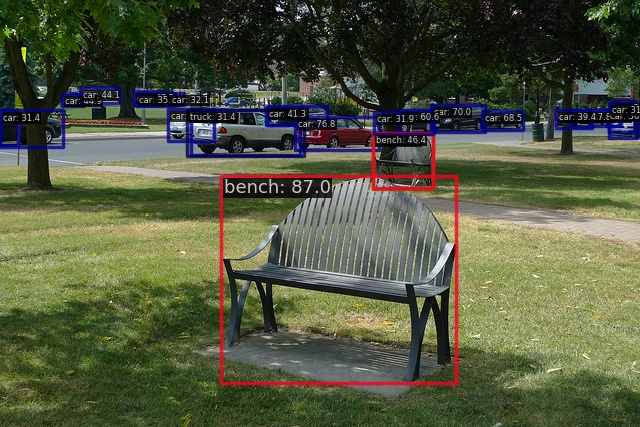

In [15]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

In [14]:
config_car_detection = """
# Inherit and overwrite part of the config based on this config
_base_ = '/home/kwy00/mmdetection/configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py'

data_root = '/home/kwy00/mmdetection/data/car_detection/' # dataset root

train_batch_size_per_gpu = 8
train_num_workers = 2

max_epochs = 30
stage2_num_epochs = 1
base_lr = 0.00015

metainfo = {
    'classes' : (
        'chevrolet_malibu_sedan_2012_2016',
        'chevrolet_malibu_sedan_2017_2019',
        'chevrolet_spark_hatchback_2016_2021',
        'chevrolet_trailblazer_suv_2021_',
        'chevrolet_trax_suv_2017_2019',
        'genesis_g80_sedan_2016_2020',
        'genesis_g80_sedan_2021_',
        'genesis_gv80_suv_2020_',
        'hyundai_avante_sedan_2011_2015',
        'hyundai_avante_sedan_2020_',
        'hyundai_grandeur_sedan_2011_2016',
        'hyundai_grandstarex_van_2018_2020',
        'hyundai_ioniq_hatchback_2016_2019',
        'hyundai_sonata_sedan_2004_2009',
        'hyundai_sonata_sedan_2010_2014',
        'hyundai_sonata_sedan_2019_2020',
        'kia_carnival_van_2015_2020',
        'kia_carnival_van_2021_',
        'kia_k5_sedan_2010_2015',
        'kia_k5_sedan_2020_',
        'kia_k7_sedan_2016_2020',
        'kia_mohave_suv_2020_',
        'kia_morning_hatchback_2004_2010',
        'kia_morning_hatchback_2011_2016',
        'kia_ray_hatchback_2012_2017',
        'kia_sorrento_suv_2015_2019',
        'kia_sorrento_suv_2020_',
        'kia_soul_suv_2014_2018',
        'kia_sportage_suv_2016_2020',
        'kia_stonic_suv_2017_2019',
        'renault_sm3_sedan_2015_2018',
        'renault_xm3_suv_2020_',
        'ssangyong_korando_suv_2019_2020',
        'ssangyong_tivoli_suv_2016_2020',
        'UNKNOWN',
    )
}

train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    dataset=dict(
        data_root=data_root,
        data_prefix=dict(img='train/'),
        ann_file='train.json',
        metainfo=metainfo
    )
)    
        
val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        data_prefix=dict(img='val/'),
        ann_file='val.json',
        metainfo=metainfo
    )
)

test_dataloader = dict(
    batch_size=1,
    num_workers=2,
    dataset=dict(
        test_mode=True,
        # explicitly add your class names to the field 'metainfo'
        metainfo=metainfo,
        data_root=data_root,
        data_prefix=dict(img='test/'),
        ann_file='test.json'
    )
)


# test_dataloader = val_dataloader

val_evaluator = dict(ann_file=data_root + 'val.json')

# test_evaluator = val_evaluator

model = dict(bbox_head=dict(num_classes=35))

# learning rate
param_scheduler = [
    dict(
        type='LinearLR',
        start_factor=1.0e-5,
        by_epoch=False,
        begin=0,
        end=10),
    dict(
        # use cosine lr from 10 to 20 epoch
        type='CosineAnnealingLR',
        eta_min=base_lr * 0.05,
        begin=max_epochs // 2,
        end=max_epochs,
        T_max=max_epochs // 2,
        by_epoch=True,
        convert_to_iter_based=True),
]

train_pipeline_stage2 = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(640, 640),
        ratio_range=(0.1, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(640, 640)),
    dict(type='YOLOXHSVRandomAug'),
    dict(type='RandomFlip', prob=0.5),
    dict(type='Pad', size=(640, 640), pad_val=dict(img=(114, 114, 114))),
    dict(type='PackDetInputs')
]

# optimizer
optim_wrapper = dict(
    _delete_=True,
    type='OptimWrapper',
    optimizer=dict(type='AdamW', lr=base_lr, weight_decay=0.05),
    paramwise_cfg=dict(
        norm_decay_mult=0, bias_decay_mult=0, bypass_duplicate=True))

default_hooks = dict(
    checkpoint=dict(
        interval=5,
        max_keep_ckpts=2,  # only keep latest 2 checkpoints
        save_best='auto'
    ),
    logger=dict(type='LoggerHook', interval=5))

custom_hooks = [
    dict(
        type='PipelineSwitchHook',
        switch_epoch=max_epochs - stage2_num_epochs,
        switch_pipeline=train_pipeline_stage2)
]

# load COCO pre-trained weight
load_from = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=max_epochs, val_interval=1)
visualizer = dict(vis_backends=[dict(type='LocalVisBackend'),dict(type='TensorboardVisBackend')])
"""

with open('./configs/rtmdet/rtmdet_tiny_1xb4-35e_car_detection.py', 'w') as f:
    f.write(config_car_detection)

In [15]:
!python3 tools/train.py configs/rtmdet/rtmdet_tiny_1xb4-35e_car_detection.py

11/10 00:07:30 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 1405505192
    GPU 0,1: NVIDIA GeForce RTX 3090
    CUDA_HOME: /
    NVCC: Cuda compilation tools, release 11.5, V11.5.119
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=com

In [ ]:
# load tensorboard in colab
%load_ext tensorboard


# see curves in tensorboard
%tensorboard --logdir ./work_dirs

In [22]:
from mmdet.apis import DetInferencer
import glob


# Choose to use a config
config = 'configs/rtmdet/rtmdet_tiny_1xb4-35e_car_detection.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('./work_dirs/rtmdet_tiny_1xb4-35e_car_detection/epoch_30.pth')[0]
# # Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

Loads checkpoint by local backend from path: ./work_dirs/rtmdet_tiny_1xb4-35e_car_detection/epoch_30.pth


In [23]:
# Use the detector to do inference
img = './data/car_detection/test/064507368.png'
result = inferencer(img, out_dir='./output', return_datasamples=True, no_save_pred=False, return_vis=True)

Output()

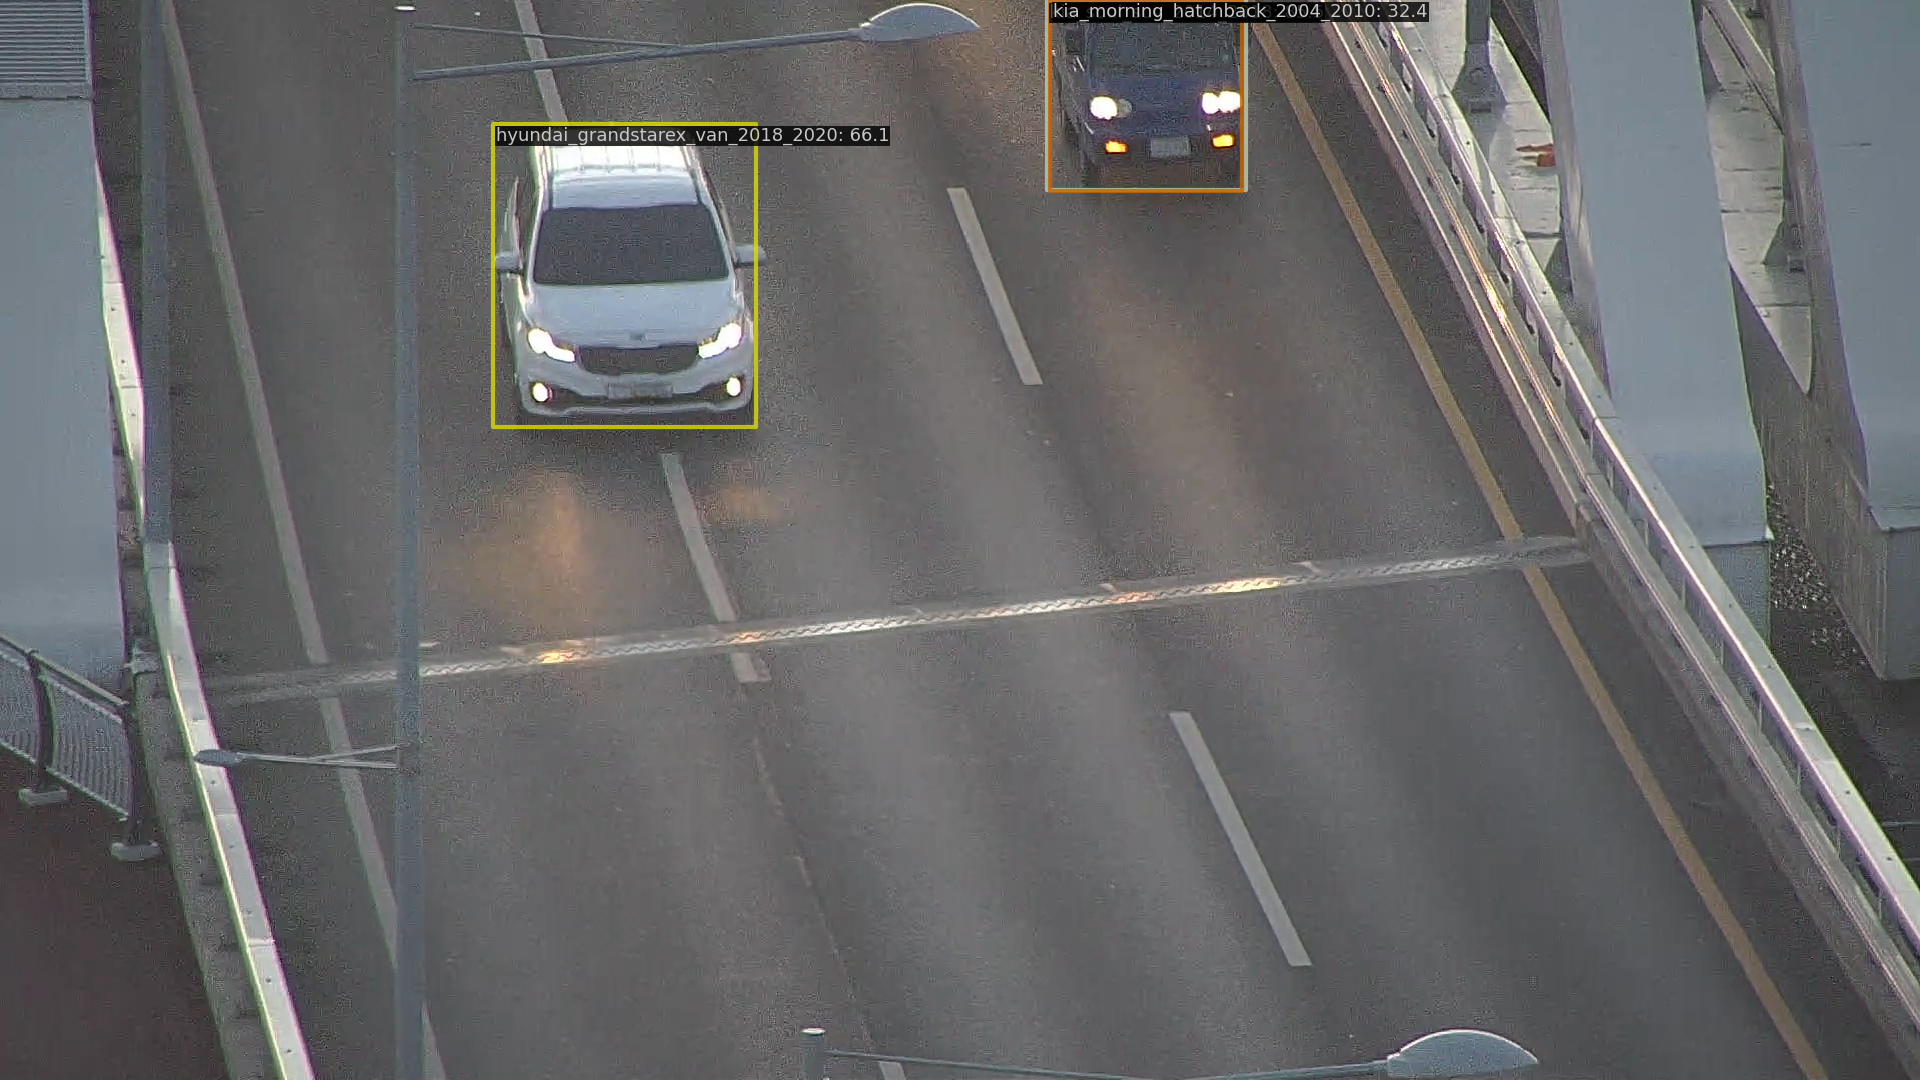

In [24]:
# Show the output image
from PIL import Image 
Image.open('./output/vis/064507368.png')

In [ ]:
from rich.pretty import pprint
pprint(result, max_length=4)

In [25]:
result = inferencer('/home/kwy00/mmdetection/data/car_detection/test/', return_datasamples=False, no_save_pred=True, return_vis=False)

Output()

In [ ]:
from rich.pretty import pprint
pprint(result, max_length=4)

In [5]:
result['predictions'][0]['labels'][4]

11

In [6]:
import pandas as pd
import os

test_img = glob.glob('/home/kwy00/mmdetection/data/car_detection/test/*.png')

def inference(predict_size):    
    result_csv = pd.read_csv('/home/kwy00/ysy/sample_submission.csv')
    
    for i in range(len(result['predictions'])):        
        labels = list()
        scores = list()
        for key in ['labels', 'scores', 'bboxes']:
            arr = result['predictions'][i][key]
            if key == 'labels':
                for index in range(predict_size):
                    labels.append(arr[index])
            elif key == 'scores':
                for index in range(predict_size):
                    scores.append(arr[index])
            else:
                for index in range(predict_size):
                    x_min = arr[index][0]
                    y_min = arr[index][1]
                    x_max = arr[index][2]
                    y_max = arr[index][3]
                        
                      
                    index_list = list([1])
                    new_row = pd.DataFrame({"file_name": test_img[i].split('/')[-1],
                                        "class_id": labels[index],
                                        "confidence": scores[index],
                                        "point1_x":x_min, "point1_y":y_min,
                                        "point2_x":x_max, "point2_y":y_min,
                                        "point3_x":x_max, "point3_y":y_max,
                                        "point4_x":x_min, "point4_y":y_max},
                                        index=index_list)
                    result_csv = pd.concat([result_csv, new_row], ignore_index=True)      
                 
    
    resultpath = os.path.join('/home/kwy00/temporary_result', 'baseline_submit.csv')
    # 결과를 CSV 파일로 저장
    result_csv.to_csv(resultpath, index=False)
    
    print('Done.')


In [8]:
inference(10)

/tmp/ipykernel_14905/2105600488.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_csv = pd.concat([result_csv, new_row], ignore_index=True)


Done.


In [ ]:
# 일부 필드 변경
classes = ('chevrolet_malibu_sedan_2012_2016',
'chevrolet_malibu_sedan_2017_2019',
'chevrolet_spark_hatchback_2016_2021',
'chevrolet_trailblazer_suv_2021_',
'chevrolet_trax_suv_2017_2019',
'genesis_g80_sedan_2016_2020',
'genesis_g80_sedan_2021_',
'genesis_gv80_suv_2020_',
'hyundai_avante_sedan_2011_2015',
'hyundai_avante_sedan_2020_',
'hyundai_grandeur_sedan_2011_2016',
'hyundai_grandstarex_van_2018_2020',
'hyundai_ioniq_hatchback_2016_2019',
'hyundai_sonata_sedan_2004_2009',
'hyundai_sonata_sedan_2010_2014',
'hyundai_sonata_sedan_2019_2020',
'kia_carnival_van_2015_2020',
'kia_carnival_van_2021_',
'kia_k5_sedan_2010_2015',
'kia_k5_sedan_2020_',
'kia_k7_sedan_2016_2020',
'kia_mohave_suv_2020_',
'kia_morning_hatchback_2004_2010',
'kia_morning_hatchback_2011_2016',
'kia_ray_hatchback_2012_2017',
'kia_sorrento_suv_2015_2019',
'kia_sorrento_suv_2020_',
'kia_soul_suv_2014_2018',
'kia_sportage_suv_2016_2020',
'kia_stonic_suv_2017_2019',
'renault_sm3_sedan_2015_2018',
'renault_xm3_suv_2020_',
'ssangyong_korando_suv_2019_2020',
'ssangyong_tivoli_suv_2016_2020')